Matplotlib is building the font cache; this may take a moment.


Performance Evaluation:
Mean Filter - MSE: 554.47, PSNR: 20.69 dB
Median Filter - MSE: 381.26, PSNR: 22.32 dB
Gaussian Filter - MSE: 395.62, PSNR: 22.16 dB


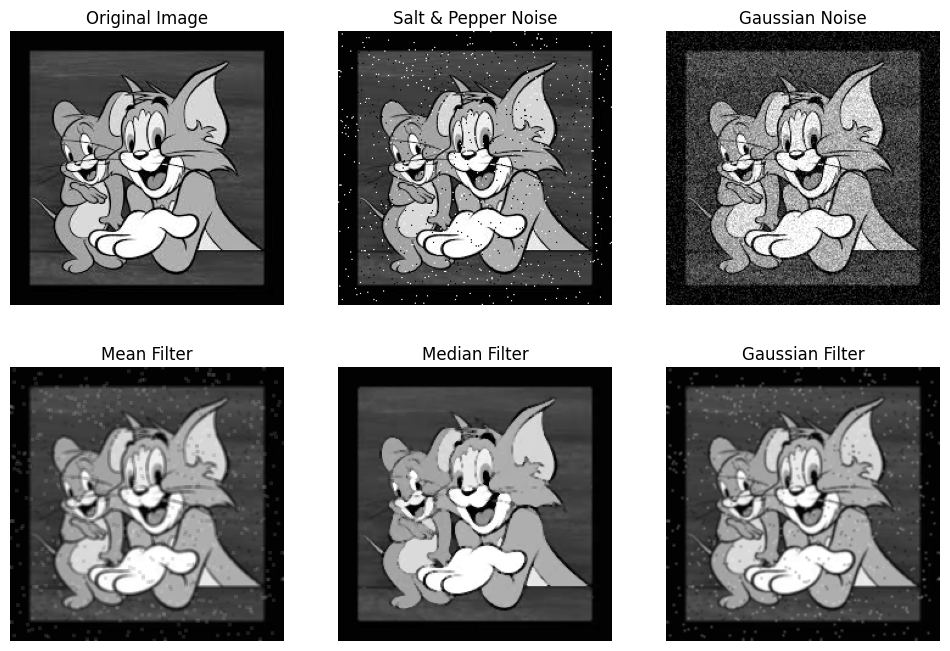

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr, mean_squared_error as mse

def apply_mean_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

def apply_gaussian_filter(image, kernel_size=3):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Load image
gray_image = cv2.imread('download.jpeg', cv2.IMREAD_GRAYSCALE)

# Add artificial noise
noisy_image_sp = random_noise(gray_image, mode='s&p', amount=0.02)
noisy_image_gaussian = random_noise(gray_image, mode='gaussian', var=0.01)

noisy_image_sp = img_as_ubyte(noisy_image_sp)
noisy_image_gaussian = img_as_ubyte(noisy_image_gaussian)

# Apply filters
mean_filtered = apply_mean_filter(noisy_image_sp)
median_filtered = apply_median_filter(noisy_image_sp)
gaussian_filtered = apply_gaussian_filter(noisy_image_sp)

# Evaluate performance
filters = {'Mean': mean_filtered, 'Median': median_filtered, 'Gaussian': gaussian_filtered}

print("Performance Evaluation:")
for name, filtered_img in filters.items():
    error = mse(gray_image, filtered_img)
    signal_noise_ratio = psnr(gray_image, filtered_img)
    print(f"{name} Filter - MSE: {error:.2f}, PSNR: {signal_noise_ratio:.2f} dB")

# Display images
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 1].imshow(noisy_image_sp, cmap='gray')
axs[0, 1].set_title("Salt & Pepper Noise")
axs[0, 2].imshow(noisy_image_gaussian, cmap='gray')
axs[0, 2].set_title("Gaussian Noise")

axs[1, 0].imshow(mean_filtered, cmap='gray')
axs[1, 0].set_title("Mean Filter")
axs[1, 1].imshow(median_filtered, cmap='gray')
axs[1, 1].set_title("Median Filter")
axs[1, 2].imshow(gaussian_filtered, cmap='gray')
axs[1, 2].set_title("Gaussian Filter")

for ax in axs.flat:
    ax.axis("off")
plt.show()
